In [1]:
#import the needed librairies
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [2]:
#import the data
df_full= pd.read_csv("..\data\Crime_Data_from_2020_to_Present.csv")
print(f"   📊 Dimensions totales: {df_full.shape[0]:,} lignes × {df_full.shape[1]} colonnes")
print(f"   💾 Taille mémoire: {df_full.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

   📊 Dimensions totales: 1,004,876 lignes × 28 colonnes
   💾 Taille mémoire: 948.26 MB


In [3]:
df_full["Date Rptd"] = pd.to_datetime(df_full["Date Rptd"])

# Trier par Date Rptd
df_full = df_full.sort_values("Date Rptd")


C:\Users\pc\AppData\Local\Temp\ipykernel_14344\2815273834.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_full["Date Rptd"] = pd.to_datetime(df_full["Date Rptd"])


In [4]:
df_full.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
76400,200604004,2020-01-01,01/01/2020 12:00:00 AM,10,6,Hollywood,668,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 0416 1414,41,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,626.0,NaN,NaN,NaN,5700 VIRGINIA AV,NaN,34.0918,-118.3136
57481,201304039,2020-01-01,01/01/2020 12:00:00 AM,1156,13,Newton,1371,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0913 1814 2000 0416,34,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,626.0,NaN,NaN,NaN,5300 S MAIN ST,NaN,33.9924,-118.2772
123257,202104020,2020-01-01,01/01/2020 12:00:00 AM,2040,21,Topanga,2189,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 0352,26,M,X,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,20800 VENTURA BL,NaN,34.1665,-118.5859
147894,202104017,2020-01-01,01/01/2020 12:00:00 AM,1300,21,Topanga,2136,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443,32,M,H,108.0,PARKING LOT,511.0,VERBAL THREAT,IC,Invest Cont,930.0,NaN,NaN,NaN,21300 SHERMAN WY,NaN,34.2047,-118.5994
49390,200604039,2020-01-01,01/01/2020 12:00:00 AM,220,6,Hollywood,646,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,0,X,X,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,6700 HOLLYWOOD BL,NaN,34.1016,-118.3361


In [5]:
df_full.tail(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
902403,250504065,2025-01-21,12/26/2024 12:00:00 AM,2117,5,Harbor,527,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",NaN,0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,600 W HARRY BRIDGE BL,NaN,33.7626,-118.2687
920500,250404045,2025-01-21,12/24/2024 12:00:00 AM,210,4,Hollenbeck,417,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0311 0329,38,F,H,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,4400 TOURMALINE ST,NaN,34.0797,-118.1933
962341,250504084,2025-01-24,12/18/2024 12:00:00 AM,2000,5,Harbor,523,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",NaN,0,NaN,NaN,129.0,"TERMINAL, OTHER THAN MTA",NaN,NaN,IC,Invest Cont,341.0,NaN,NaN,NaN,2000 JOHN S GIBSON BL,NaN,33.7566,-118.2896
885910,250904067,2025-01-28,09/27/2024 12:00:00 AM,1125,9,Van Nuys,914,2,354,THEFT OF IDENTITY,0928 1822,61,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,7000 WILLIS AV,NaN,34.1975,-118.4552
987405,250704070,2025-01-29,12/30/2024 12:00:00 AM,1500,7,Wilshire,719,2,649,DOCUMENT FORGERY / STOLEN FELONY,1822 0344 0929 0100 0930,54,F,W,602.0,BANK,NaN,NaN,IC,Invest Cont,649.0,NaN,NaN,NaN,500 N LARCHMONT BL,NaN,34.0790,-118.3236


In [6]:
# Définir le nombre de lignes à extraire
n_rows = 400000
if len(df_full) >= n_rows:
    df_400k = df_full.head(n_rows).copy()
    print(f"\n✅ Extraction réussie de {n_rows:,} lignes ({(n_rows/len(df_full)*100):.1f}% du total)")
print(f"📊 Dimensions extraites: {df_400k.shape[0]:,} lignes × {df_400k.shape[1]} colonnes")


✅ Extraction réussie de 400,000 lignes (39.8% du total)
📊 Dimensions extraites: 400,000 lignes × 28 colonnes


In [7]:
df_400k.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
76400,200604004,2020-01-01,01/01/2020 12:00:00 AM,10,6,Hollywood,668,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 0416 1414,41,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,626.0,NaN,NaN,NaN,5700 VIRGINIA AV,NaN,34.0918,-118.3136
57481,201304039,2020-01-01,01/01/2020 12:00:00 AM,1156,13,Newton,1371,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0913 1814 2000 0416,34,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,626.0,NaN,NaN,NaN,5300 S MAIN ST,NaN,33.9924,-118.2772
123257,202104020,2020-01-01,01/01/2020 12:00:00 AM,2040,21,Topanga,2189,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 0352,26,M,X,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,20800 VENTURA BL,NaN,34.1665,-118.5859
147894,202104017,2020-01-01,01/01/2020 12:00:00 AM,1300,21,Topanga,2136,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443,32,M,H,108.0,PARKING LOT,511.0,VERBAL THREAT,IC,Invest Cont,930.0,NaN,NaN,NaN,21300 SHERMAN WY,NaN,34.2047,-118.5994
49390,200604039,2020-01-01,01/01/2020 12:00:00 AM,220,6,Hollywood,646,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,0,X,X,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,6700 HOLLYWOOD BL,NaN,34.1016,-118.3361


In [8]:
df_400k.to_csv("..\data\crime_v1.csv")

In [9]:
df=df_400k.copy()

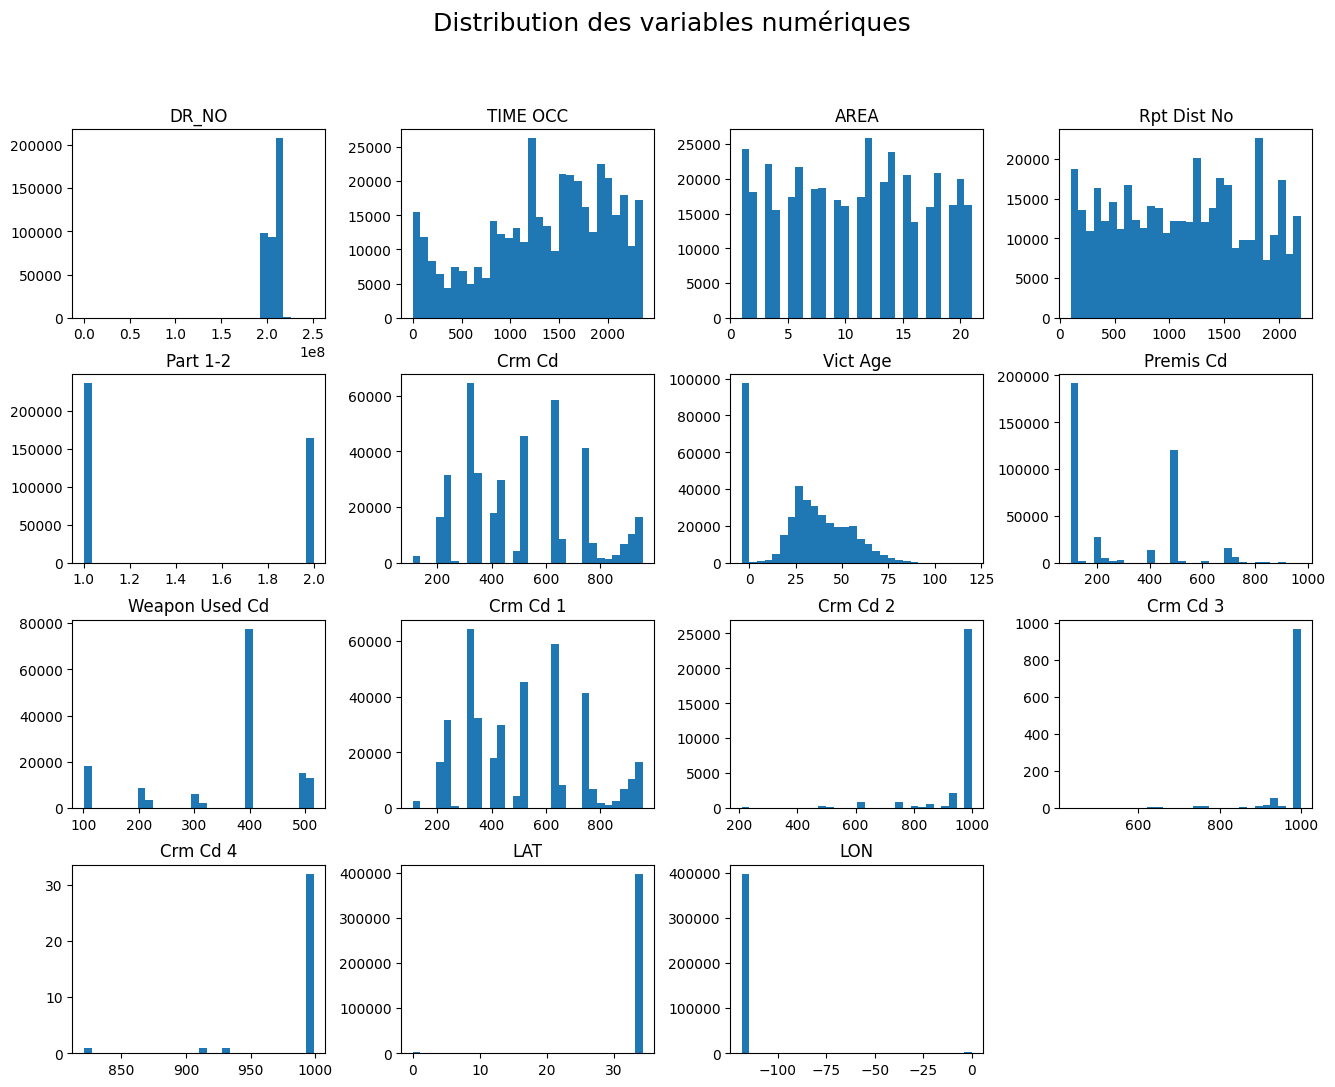

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Sélection des colonnes numériques
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histogrammes
df[numeric_cols].hist(
    bins=30,
    figsize=(16, 12),
    grid=False
)

plt.suptitle("Distribution des variables numériques", fontsize=18)
plt.show()


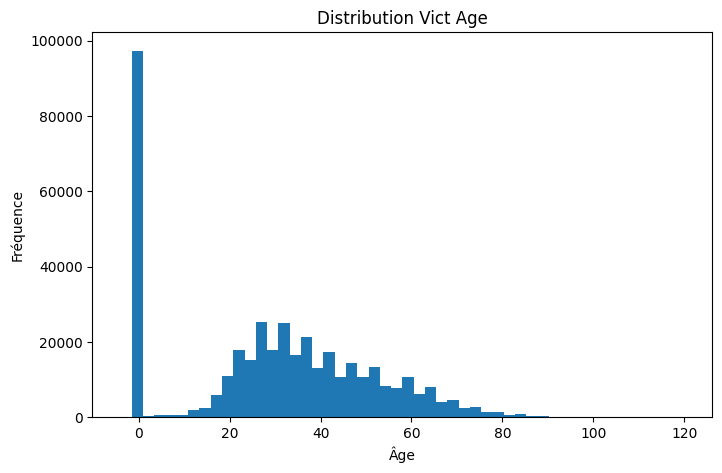

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df['Vict Age'], bins=50)
plt.title("Distribution Vict Age")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


In [12]:
# Exemple pour toutes les colonnes numériques
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} → {len(outliers)} valeurs aberrantes")


DR_NO → 23 valeurs aberrantes
TIME OCC → 0 valeurs aberrantes
AREA → 0 valeurs aberrantes
Rpt Dist No → 0 valeurs aberrantes
Part 1-2 → 0 valeurs aberrantes
Crm Cd → 0 valeurs aberrantes
Vict Age → 196 valeurs aberrantes
Premis Cd → 0 valeurs aberrantes
Weapon Used Cd → 18168 valeurs aberrantes
Crm Cd 1 → 0 valeurs aberrantes
Crm Cd 2 → 6452 valeurs aberrantes
Crm Cd 3 → 142 valeurs aberrantes
Crm Cd 4 → 4 valeurs aberrantes
LAT → 11958 valeurs aberrantes
LON → 2253 valeurs aberrantes


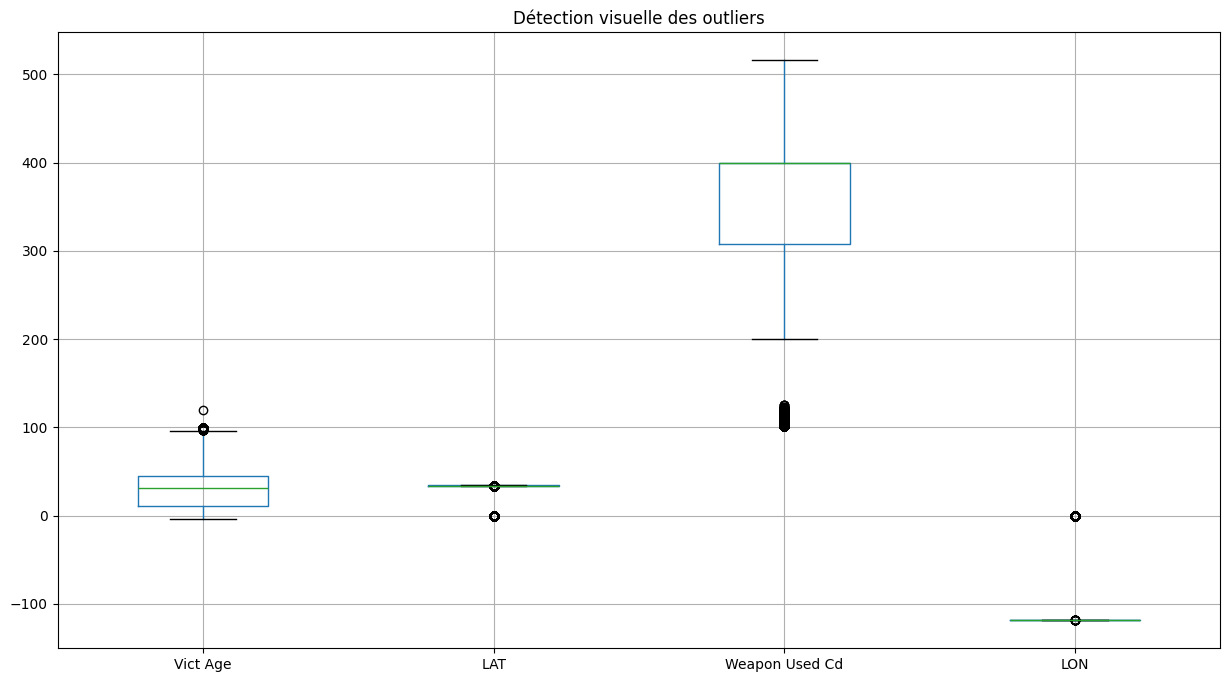

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
df.boxplot(column=['Vict Age', 'LAT', 'Weapon Used Cd','LON']) 
plt.title("Détection visuelle des outliers")
plt.show()


In [14]:
df.shape

(400000, 28)

# Data preprocessing steps :

## **Check the data types of the columns** :

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 76400 to 201812
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           400000 non-null  int64         
 1   Date Rptd       400000 non-null  datetime64[ns]
 2   DATE OCC        400000 non-null  object        
 3   TIME OCC        400000 non-null  int64         
 4   AREA            400000 non-null  int64         
 5   AREA NAME       400000 non-null  object        
 6   Rpt Dist No     400000 non-null  int64         
 7   Part 1-2        400000 non-null  int64         
 8   Crm Cd          400000 non-null  int64         
 9   Crm Cd Desc     400000 non-null  object        
 10  Mocodes         344636 non-null  object        
 11  Vict Age        400000 non-null  int64         
 12  Vict Sex        347031 non-null  object        
 13  Vict Descent    347026 non-null  object        
 14  Premis Cd       399995 non-null  floa

In [16]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [17]:
df.columns = (
    df.columns
    .str.lower()               # tout en minuscule
    .str.replace(' ', '_')     # remplacer espace par _
    .str.replace('-', '_')     # remplacer tiret par _
    .str.replace('/', '_')     # remplacer slash par _
    .str.replace(r'[^a-z0-9_]', '', regex=True)  # enlever caractères spéciaux
)


In [18]:
# drop code crime 
df.drop("dr_no",axis=1,inplace=True)

In [19]:
df = df.rename(columns={"part_1_2": "crm_risk"})

In [20]:
df.head(3)

,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_risk,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon
76400,2020-01-01,01/01/2020 12:00:00 AM,10,6,Hollywood,668,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 0416 1414,41,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,626.0,NaN,NaN,NaN,5700 VIRGINIA AV,NaN,34.0918,-118.3136
57481,2020-01-01,01/01/2020 12:00:00 AM,1156,13,Newton,1371,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0913 1814 2000 0416,34,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,626.0,NaN,NaN,NaN,5300 S MAIN ST,NaN,33.9924,-118.2772
123257,2020-01-01,01/01/2020 12:00:00 AM,2040,21,Topanga,2189,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 0352,26,M,X,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,20800 VENTURA BL,NaN,34.1665,-118.5859


In [21]:
df.columns

Index(['date_rptd', 'date_occ', 'time_occ', 'area', 'area_name', 'rpt_dist_no',
       'crm_risk', 'crm_cd', 'crm_cd_desc', 'mocodes', 'vict_age', 'vict_sex',
       'vict_descent', 'premis_cd', 'premis_desc', 'weapon_used_cd',
       'weapon_desc', 'status', 'status_desc', 'crm_cd_1', 'crm_cd_2',
       'crm_cd_3', 'crm_cd_4', 'location', 'cross_street', 'lat', 'lon'],
      dtype='object')

# drop duplicated columns

In [22]:
df.duplicated().sum()

np.int64(1112)

In [23]:
df=df.drop_duplicates()

In [24]:
df.shape

(398888, 27)

# Type casting


In [25]:
# Conversion date
df['date_occ'] = pd.to_datetime(df['date_occ'], format="%m/%d/%Y %I:%M:%S %p")

# Features temporelles
df['Year']      = df['date_occ'].dt.year
df['Month']     = df['date_occ'].dt.month
df['Day']       = df['date_occ'].dt.day
df['Hour']      = df['time_occ'] // 100
df['Minute']    = df['time_occ'] % 100 
df['Weekday']   = df['date_occ'].dt.weekday  
df['is_weekend']= df['Weekday'].isin([5, 6])

In [26]:
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['Hour_Bin'] = pd.cut(df['Hour'], bins=bins, labels=labels, right=False)


In [27]:
df.head()

,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_risk,crm_cd,crm_cd_desc,mocodes,vict_age,vict_sex,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,crm_cd_2,crm_cd_3,crm_cd_4,location,cross_street,lat,lon,Year,Month,Day,Hour,Minute,Weekday,is_weekend,Hour_Bin
76400,2020-01-01,2020-01-01,10,6,Hollywood,668,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 0416 1414,41,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,626.0,NaN,NaN,NaN,5700 VIRGINIA AV,NaN,34.0918,-118.3136,2020,1,1,0,10,2,False,Night
57481,2020-01-01,2020-01-01,1156,13,Newton,1371,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0913 1814 2000 0416,34,M,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,626.0,NaN,NaN,NaN,5300 S MAIN ST,NaN,33.9924,-118.2772,2020,1,1,11,56,2,False,Morning
123257,2020-01-01,2020-01-01,2040,21,Topanga,2189,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 0352,26,M,X,404.0,DEPARTMENT STORE,NaN,NaN,IC,Invest Cont,442.0,NaN,NaN,NaN,20800 VENTURA BL,NaN,34.1665,-118.5859,2020,1,1,20,40,2,False,Evening
147894,2020-01-01,2020-01-01,1300,21,Topanga,2136,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443,32,M,H,108.0,PARKING LOT,511.0,VERBAL THREAT,IC,Invest Cont,930.0,NaN,NaN,NaN,21300 SHERMAN WY,NaN,34.2047,-118.5994,2020,1,1,13,0,2,False,Afternoon
49390,2020-01-01,2020-01-01,220,6,Hollywood,646,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,0,X,X,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,6700 HOLLYWOOD BL,NaN,34.1016,-118.3361,2020,1,1,2,20,2,False,Night


## NAN values

In [28]:
df.isna().sum()

date_rptd              0
date_occ               0
time_occ               0
area                   0
area_name              0
rpt_dist_no            0
crm_risk               0
crm_cd                 0
crm_cd_desc            0
mocodes            54930
vict_age               0
vict_sex           52553
vict_descent       52558
premis_cd              5
premis_desc          161
weapon_used_cd    254383
weapon_desc       254383
status                 0
status_desc            0
crm_cd_1               4
crm_cd_2          366884
crm_cd_3          397783
crm_cd_4          398853
location               0
cross_street      328655
lat                    0
lon                    0
Year                   0
Month                  0
Day                    0
Hour                   0
Minute                 0
Weekday                0
is_weekend             0
Hour_Bin               0
dtype: int64

In [29]:
df.nunique()

date_rptd            730
date_occ             730
time_occ            1439
area                  21
area_name             21
rpt_dist_no         1180
crm_risk               2
crm_cd               135
crm_cd_desc          135
mocodes           150315
vict_age             102
vict_sex               4
vict_descent          19
premis_cd            306
premis_desc          302
weapon_used_cd        78
weapon_desc           78
status                 5
status_desc            5
crm_cd_1             137
crm_cd_2             112
crm_cd_3              30
crm_cd_4               5
location           53416
cross_street        7576
lat                 5239
lon                 4910
Year                   2
Month                 12
Day                   31
Hour                  24
Minute                60
Weekday                7
is_weekend             2
Hour_Bin               4
dtype: int64

In [30]:
df['vict_age'].describe() 


count    398888.000000
mean         30.072446
std          21.695913
min          -4.000000
25%          12.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: vict_age, dtype: float64

In [31]:
df["vict_age"].value_counts()

vict_age
 0      96524
 30      9145
 29      8799
 35      8723
 28      8656
        ...  
 98        32
 97        26
-1          4
 120        1
-4          1
Name: count, Length: 102, dtype: int64

In [32]:
df.loc[(df['vict_age'] < 0) | (df['vict_age'] > 100), 'vict_age'] = np.nan

# Optionnel : imputer par la moyenne
median_age = df['vict_age'].mean()
df['vict_age'].fillna(median_age, inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_14344\4070990975.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vict_age'].fillna(median_age, inplace=True)


In [33]:
df['vict_descent'].fillna('UNKNOWN', inplace=True)

print("Number of null values:", df['vict_descent'].isnull().sum())

Number of null values: 0


C:\Users\pc\AppData\Local\Temp\ipykernel_14344\234686060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vict_descent'].fillna('UNKNOWN', inplace=True)


In [34]:
df["vict_sex"].value_counts()
df['vict_sex'] = df['vict_sex'].fillna('X')
df['vict_sex'] = df['vict_sex'].replace({'H': 'X', '-': 'X'})


In [35]:
df["vict_sex"].value_counts()

vict_sex
M    168970
F    145134
X     84784
Name: count, dtype: int64

In [36]:
df["vict_descent"]= df['vict_descent'].replace({'-': 'UNKNOWN'})

In [37]:
df.isna().mean().sort_values(ascending=False) * 100


crm_cd_4          99.991226
crm_cd_3          99.722980
crm_cd_2          91.976695
cross_street      82.392802
weapon_used_cd    63.773039
weapon_desc       63.773039
mocodes           13.770783
premis_desc        0.040362
premis_cd          0.001253
crm_cd_1           0.001003
date_rptd          0.000000
time_occ           0.000000
date_occ           0.000000
crm_cd             0.000000
crm_cd_desc        0.000000
vict_age           0.000000
area               0.000000
rpt_dist_no        0.000000
area_name          0.000000
status_desc        0.000000
status             0.000000
vict_descent       0.000000
vict_sex           0.000000
crm_risk           0.000000
location           0.000000
lat                0.000000
lon                0.000000
Year               0.000000
Month              0.000000
Day                0.000000
Hour               0.000000
Minute             0.000000
Weekday            0.000000
is_weekend         0.000000
Hour_Bin           0.000000
dtype: float64

In [38]:
mode_mocodes = df['mocodes'].mode()
if not mode_mocodes.empty:
    df['mocodes'] = df['mocodes'].fillna(mode_mocodes[0])
mode_premis = df['premis_cd'].mode()
if not mode_premis.empty:
    df['premis_cd'].fillna(df['premis_cd'].median(), inplace=True)
mode_premis = df['premis_desc'].mode()
if not mode_premis.empty:
    df['premis_desc'] = df['premis_desc'].fillna(mode_premis[0])
mode_status = df['status'].mode()
if not mode_status.empty:
    df['status'] = df['status'].fillna(mode_status[0])

C:\Users\pc\AppData\Local\Temp\ipykernel_14344\2534119087.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['premis_cd'].fillna(df['premis_cd'].median(), inplace=True)


In [39]:
import re
df['premis_desc'] = df['premis_desc'].str.title()

df['premis_desc'] = df['premis_desc'].str.replace(r'\(.*?\)', '', regex=True)

df['premis_desc'] = df['premis_desc'].apply(
    lambda x: re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', str(x))
)

df['premis_desc'] = df['premis_desc'].str.strip()
df['premis_desc'] = df['premis_desc'].str.replace(r'\s+', ' ', regex=True)



In [40]:
df["premis_desc"]

76400     Single Family Dwelling
57481        Multi-Unit Dwelling
123257          Department Store
147894               Parking Lot
49390                   Sidewalk
                   ...          
350677    Single Family Dwelling
369132    Single Family Dwelling
359379            Other Business
365336                    Street
201812    Single Family Dwelling
Name: premis_desc, Length: 398888, dtype: object

In [41]:
df['weapon_desc'] = df['weapon_desc'].fillna('NO WEAPON')
df['weapon_used_cd'] = df['weapon_used_cd'].fillna(0.0)

In [42]:
#I will remove the columns Crm Cd 1 to Crm Cd 4 because they contain additional crime codes:
# Crm Cd 1 is usually identical to Crm Cd, and the others are almost entirely empty.
df.drop("crm_cd_1",axis=1,inplace=True)


In [43]:
threshold = 0.5

cols_to_drop = []

for col in df.columns:
    null_ratio = df[col].isnull().mean()
    if null_ratio > threshold:
        cols_to_drop.append(col)
        print(f"Dropping column '{col}' with {null_ratio*100:.2f}% null values")

df.drop(columns=cols_to_drop, inplace=True)

Dropping column 'crm_cd_2' with 91.98% null values
Dropping column 'crm_cd_3' with 99.72% null values
Dropping column 'crm_cd_4' with 99.99% null values
Dropping column 'cross_street' with 82.39% null values


In [44]:
df.isna().sum()

date_rptd         0
date_occ          0
time_occ          0
area              0
area_name         0
rpt_dist_no       0
crm_risk          0
crm_cd            0
crm_cd_desc       0
mocodes           0
vict_age          0
vict_sex          0
vict_descent      0
premis_cd         0
premis_desc       0
weapon_used_cd    0
weapon_desc       0
status            0
status_desc       0
location          0
lat               0
lon               0
Year              0
Month             0
Day               0
Hour              0
Minute            0
Weekday           0
is_weekend        0
Hour_Bin          0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398888 entries, 76400 to 201812
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date_rptd       398888 non-null  datetime64[ns]
 1   date_occ        398888 non-null  datetime64[ns]
 2   time_occ        398888 non-null  int64         
 3   area            398888 non-null  int64         
 4   area_name       398888 non-null  object        
 5   rpt_dist_no     398888 non-null  int64         
 6   crm_risk        398888 non-null  int64         
 7   crm_cd          398888 non-null  int64         
 8   crm_cd_desc     398888 non-null  object        
 9   mocodes         398888 non-null  object        
 10  vict_age        398888 non-null  float64       
 11  vict_sex        398888 non-null  object        
 12  vict_descent    398888 non-null  object        
 13  premis_cd       398888 non-null  float64       
 14  premis_desc     398888 non-null  obje

In [46]:
df['Hour_Bin'] = df['Hour_Bin'].astype('object')

## transform categorical values

In [47]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)


Index(['area_name', 'crm_cd_desc', 'mocodes', 'vict_sex', 'vict_descent',
       'premis_desc', 'weapon_desc', 'status', 'status_desc', 'location',
       'Hour_Bin'],
      dtype='object')


In [48]:
df[cat_cols]

,area_name,crm_cd_desc,mocodes,vict_sex,vict_descent,premis_desc,weapon_desc,status,status_desc,location,Hour_Bin
76400,Hollywood,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 0416 1414,F,H,Single Family Dwelling,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,5700 VIRGINIA AV,Night
57481,Newton,INTIMATE PARTNER - SIMPLE ASSAULT,0913 1814 2000 0416,M,H,Multi-Unit Dwelling,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,5300 S MAIN ST,Morning
123257,Topanga,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 0352,M,X,Department Store,NO WEAPON,IC,Invest Cont,20800 VENTURA BL,Evening
147894,Topanga,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443,M,H,Parking Lot,VERBAL THREAT,IC,Invest Cont,21300 SHERMAN WY,Afternoon
49390,Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,X,X,Sidewalk,NO WEAPON,IC,Invest Cont,6700 HOLLYWOOD BL,Night
...,...,...,...,...,...,...,...,...,...,...,...
350677,Southwest,INTIMATE PARTNER - SIMPLE ASSAULT,1202 0913 2000 1814 2021 0416 0446 0444 2002,F,B,Single Family Dwelling,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1900 W 22ND ST,Evening
369132,Hollywood,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",0344 0913,F,O,Single Family Dwelling,NO WEAPON,IC,Invest Cont,1900 N VAN NESS AV,Night
359379,Van Nuys,BOMB SCARE,0403,M,H,Other Business,VERBAL THREAT,AA,Adult Arrest,14300 SYLVAN ST,Morning
365336,Southwest,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1309 1822 0302 1310 1240 0432,F,W,Street,HAND GUN,IC,Invest Cont,LA BREA AV,Evening


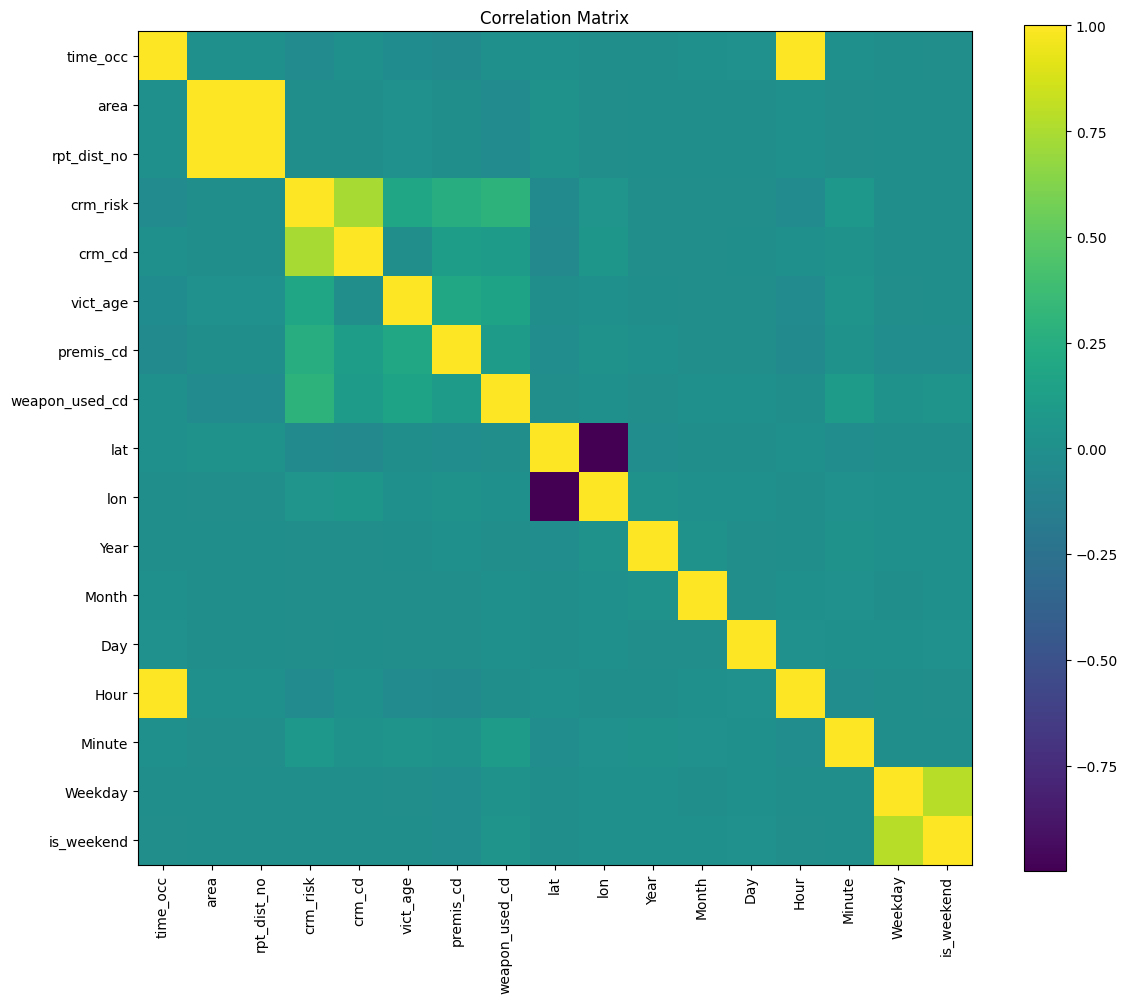

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul de la matrice de corrélation
corr = df.corr(numeric_only=True)

# Affichage du graphique
plt.figure(figsize=(12, 10))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()   # barre de couleurs automatique

# Ajouter les noms des colonnes
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


In [50]:
import numpy as np

# matrice de corrélation absolue
corr_matrix = df.corr(numeric_only=True).abs()

# sélectionner les valeurs au-dessus de 0.95 (hors diagonale)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# récupérer les colonnes fortement corrélées
high_corr = [
    (col, row, upper.loc[row, col])
    for col in upper.columns
    for row in upper.index
    if upper.loc[row, col] > 0.7
]

high_corr


[('rpt_dist_no', 'area', np.float64(0.9990278528034865)),
 ('crm_cd', 'crm_risk', np.float64(0.7351883587134835)),
 ('lon', 'lat', np.float64(0.9992550882953548)),
 ('Hour', 'time_occ', np.float64(0.9996144879335825)),
 ('is_weekend', 'Weekday', np.float64(0.7850938646968713))]

In [51]:
df[["time_occ","Hour","Minute",'Hour_Bin']]

,time_occ,Hour,Minute,Hour_Bin
76400,10,0,10,Night
57481,1156,11,56,Morning
123257,2040,20,40,Evening
147894,1300,13,0,Afternoon
49390,220,2,20,Night
...,...,...,...,...
350677,2145,21,45,Evening
369132,200,2,0,Night
359379,1023,10,23,Morning
365336,1850,18,50,Evening


In [52]:
df = df.drop(columns=['time_occ', 'is_weekend', 'rpt_dist_no'])


In [53]:
df[["area","area_name"]]

,area,area_name
76400,6,Hollywood
57481,13,Newton
123257,21,Topanga
147894,21,Topanga
49390,6,Hollywood
...,...,...
350677,3,Southwest
369132,6,Hollywood
359379,9,Van Nuys
365336,3,Southwest


In [54]:
df.dtypes

date_rptd         datetime64[ns]
date_occ          datetime64[ns]
area                       int64
area_name                 object
crm_risk                   int64
crm_cd                     int64
crm_cd_desc               object
mocodes                   object
vict_age                 float64
vict_sex                  object
vict_descent              object
premis_cd                float64
premis_desc               object
weapon_used_cd           float64
weapon_desc               object
status                    object
status_desc               object
location                  object
lat                      float64
lon                      float64
Year                       int32
Month                      int32
Day                        int32
Hour                       int64
Minute                     int64
Weekday                    int32
Hour_Bin                  object
dtype: object

# encoding

In [55]:
df["vict_descent"].value_counts()

vict_descent
H          122311
W           84578
B           57323
UNKNOWN     52558
X           35796
O           31882
A            8519
K            1984
F            1388
C            1100
J             449
V             334
I             286
Z             144
P              90
U              62
G              30
D              20
S              17
L              17
Name: count, dtype: int64

In [56]:
df["vict_sex"].value_counts()

vict_sex
M    168970
F    145134
X     84784
Name: count, dtype: int64

In [57]:
df = pd.get_dummies(df, columns=['vict_sex'], prefix='vict_sex', dtype=int)

In [58]:
# 1. Affiche les 3 colonnes qui viennent d'être créées
print("Colonnes créées pour vict_sex :")
vict_sex_columns = [col for col in df.columns if col.startswith('vict_sex_')]
print(vict_sex_columns)

# 2. Vérifie les sommes (doit correspondre à tes valeurs initiales)
print("\nVérification des comptes :")
print(df[vict_sex_columns].sum())

Colonnes créées pour vict_sex :
['vict_sex_F', 'vict_sex_M', 'vict_sex_X']

Vérification des comptes :
vict_sex_F    145134
vict_sex_M    168970
vict_sex_X     84784
dtype: int64


# feature Selection

In [59]:
# cols_to_keep = [
#     'Year','Month','Day','Hour','Minute','area', 'rpt_dist_no', 'crm_categories',
#     'crm_cd', 'vict_age', 'Vict_Descent_LE',
#     'premis_cd', 'weapon_used_cd', 'lat', 'lon'
# ]
# cols_to_keep += ['vict_sex_F', 'vict_sex_M', 'vict_sex_X']

In [60]:
# df_final = df[cols_to_keep].copy()

# print(df_final.head())
# print(df_final.shape)

In [61]:
# df_final.head()

In [62]:
# df_final.dtypes

## target construction 

In [63]:
def categorize_crime(crime):
    crime = crime.upper()

    # 1️⃣ السرقة والسطو / Theft and Burglary
    if any(x in crime for x in [
        'VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
        'SHOPLIFTING-GRAND THEFT', 'BURGLARY', 'THEFT-GRAND', 'BUNCO, GRAND THEFT',
        'THEFT PLAIN', 'THEFT FROM MOTOR VEHICLE', 'TILL TAP', 'BOAT - STOLEN',
        'DISHONEST EMPLOYEE', 'PURSE SNATCHING', 'PETTY THEFT - AUTO REPAIR',
        'SHOPLIFTING - PETTY THEFT', 'THEFT FROM PERSON', 'BUNCO, PETTY THEFT',
        'THEFT, PERSON', 'THEFT, COIN MACHINE', 'GRAND THEFT / AUTO REPAIR',
        'BIKE - ATTEMPTED STOLEN', 'VEHICLE - ATTEMPT STOLEN',
        'VEHICLE, STOLEN - OTHER', 'PICKPOCKET', 'SHOPLIFTING - ATTEMPT',
        'BUNCO, ATTEMPT', 'PICKPOCKET, ATTEMPT'
    ]):
        return 'السرقة والسطو / Theft and Burglary'

    # 2️⃣ العنف والاعتداء / Violence and Assault
    elif any(x in crime for x in [
        'ASSAULT', 'BATTERY', 'ROBBERY', 'KIDNAPPING', 'CRIMINAL HOMICIDE',
        'MANSLAUGHTER', 'ATTEMPTED ROBBERY', 'INTIMATE PARTNER - SIMPLE ASSAULT',
        'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'OTHER ASSAULT',
        'BATTERY POLICE', 'BATTERY ON A FIREFIGHTER',
        'EXTORTION', 'FALSE IMPRISONMENT', 'STALKING',
        'CHILD', 'CHILD ABUSE', 'CHILD NEGLECT', 'CHILD ANNOYING',
        'CHILD STEALING', 'DISRUPT SCHOOL', 'DRUGS, TO A MINOR',
        'CRM AGNST CHLD',
        'CONTRIBUTING', 'TRAIN WRECKING', 'FAILURE TO DISPERSE', 'BLOCKING DOOR INDUCTION CENTER'
    ]):
        return 'العنف والاعتداء / Violence and Assault'

    # 3️⃣ التخريب والتدمير / Vandalism and Destruction
    elif any(x in crime for x in [
        'VANDALISM', 'ARSON', 'SHOTS FIRED', 'THROWING OBJECT', 'DAMAGE', 'BOMB SCARE','DISTURBING THE PEACE'
    ]):
        return 'التخريب والتدمير / Vandalism and Destruction'

    # 4️⃣ الاحتيال والتزوير / Fraud and Forgery
    elif any(x in crime for x in [
        'CREDIT CARDS', 'EMBEZZLEMENT', 'DEFRAUDING', 'THEFT OF SERVICES',
        'DOCUMENT WORTHLESS', 'GRAND THEFT / INSURANCE FRAUD', 'THEFT OF IDENTITY'
    ]):
        return 'الاحتيال والتزوير / Fraud and Forgery'

    # 5️⃣ المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons
    elif any(x in crime for x in [
        'COURT ORDER', 'VIOLATION OF COURT', 'CONTEMPT', 'FALSE POLICE REPORT',
        'DOCUMENT FORGERY', 'COUNTERFEIT', 'BRIBERY', 'CONSPIRACY', 'THREATENING PHONE CALLS',
        'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER',
        'TRESPASSING', 'RESISTING ARREST', 'UNAUTHORIZED COMPUTER ACCESS',
        'WEAPON', 'FIREARM', 'BRANDISH', 'DISCHARGE', 'REPLICA FIREARMS', 'FIREARMS RESTRAINING ORDER'
    ]):
        return 'المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons'

    # 6️⃣ الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation
    elif any(x in crime for x in [
        'RAPE', 'SEX', 'INDECENT', 'LEWD', 'SODOMY', 'ORAL COPULATION',
        'SEXUAL PENETRATION', 'CHILD PORNOGRAPHY', 'HUMAN TRAFFICKING',
        'BATTERY WITH SEXUAL CONTACT', 'BEASTIALITY', 'INCEST', 'PEEPING TOM', 'BIGAMY',
        'TRAFFICKING', 'PIMPING', 'PANDERING'
    ]):
        return 'الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation'

    

    # 8️⃣ جرائم متنوعة / Miscellaneous Crimes
    elif any(x in crime for x in [
        'OTHER MISCELLANEOUS CRIME', 'ANIMAL', 'CRUELTY', 'ILLEGAL DUMPING',
        'LYNCHING', 'INCITING', 'THREAT', 'PROWLER', 'INCITING A RIOT','DRIVING', 'RECKLESS', 'FAILURE TO YIELD', 'DRUNK'
    ]):
        return 'جرائم متنوعة / Miscellaneous Crimes'

    # Default
    return 'جرائم متنوعة / Miscellaneous Crimes'

# Apply to DataFrame
df['Crime_Class'] = df['crm_cd_desc'].apply(categorize_crime)

In [64]:
# Comptage des catégories
crime_counts = df['Crime_Class'].value_counts()

# Calcul des pourcentages
crime_percent = crime_counts / crime_counts.sum() * 100

# Affichage propre
crime_percent = crime_percent.round(2)  # Arrondi à 2 décimales

print(crime_percent)

Crime_Class
السرقة والسطو / Theft and Burglary                                           44.83
العنف والاعتداء / Violence and Assault                                       28.00
التخريب والتدمير / Vandalism and Destruction                                 11.11
المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons     8.13
الاحتيال والتزوير / Fraud and Forgery                                         4.79
الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation                       2.09
جرائم متنوعة / Miscellaneous Crimes                                           1.05
Name: count, dtype: float64


In [65]:
from sklearn.preprocessing import LabelEncoder

# 1. Création du LabelEncoder et encodage de la cible
le = LabelEncoder()
df['Crime_Class_Enc'] = le.fit_transform(df['Crime_Class']) 

In [66]:
# 2. Affichage clair du mapping (c'est ce que tu veux !)
print(" Mapping des classes (Label Encoding) ".center(60, "="))
print(f"{'Code':<6} {'Classe':<50}")
print("-" * 60)
for code, classe in enumerate(le.classes_):
    print(f"{code:<6} → {classe}")
print("=" * 60)

=========== Mapping des classes (Label Encoding) ===========
Code   Classe                                            
------------------------------------------------------------
0      → الاحتيال والتزوير / Fraud and Forgery
1      → التخريب والتدمير / Vandalism and Destruction
2      → الجرائم الجنسية والاتجار / Sexual Crimes & Exploitation
3      → السرقة والسطو / Theft and Burglary
4      → العنف والاعتداء / Violence and Assault
5      → المخالفات القانونية والجرائم المتعلقة بالأسلحة / Legal Offences & Weapons
6      → جرائم متنوعة / Miscellaneous Crimes


In [67]:
# 3. Vérification rapide sur les 10 premières lignes
print("\nAperçu du résultat :")
display(df[['Crime_Class', 'Crime_Class_Enc']].head(10))


Aperçu du résultat :


,Crime_Class,Crime_Class_Enc
76400,العنف والاعتداء / Violence and Assault,4
57481,العنف والاعتداء / Violence and Assault,4
123257,السرقة والسطو / Theft and Burglary,3
147894,المخالفات القانونية والجرائم المتعلقة بالأسلحة...,5
49390,التخريب والتدمير / Vandalism and Destruction,1
68176,التخريب والتدمير / Vandalism and Destruction,1
157493,السرقة والسطو / Theft and Burglary,3
46501,التخريب والتدمير / Vandalism and Destruction,1
26022,التخريب والتدمير / Vandalism and Destruction,1
65082,المخالفات القانونية والجرائم المتعلقة بالأسلحة...,5


In [68]:
df.head()

,date_rptd,date_occ,area,area_name,crm_risk,crm_cd,crm_cd_desc,mocodes,vict_age,vict_descent,premis_cd,premis_desc,weapon_used_cd,weapon_desc,status,status_desc,location,lat,lon,Year,Month,Day,Hour,Minute,Weekday,Hour_Bin,vict_sex_F,vict_sex_M,vict_sex_X,Crime_Class,Crime_Class_Enc
76400,2020-01-01,2020-01-01,6,Hollywood,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 0400 0416 1414,41.0,H,501.0,Single Family Dwelling,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,5700 VIRGINIA AV,34.0918,-118.3136,2020,1,1,0,10,2,Night,1,0,0,العنف والاعتداء / Violence and Assault,4
57481,2020-01-01,2020-01-01,13,Newton,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,0913 1814 2000 0416,34.0,H,502.0,Multi-Unit Dwelling,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,5300 S MAIN ST,33.9924,-118.2772,2020,1,1,11,56,2,Morning,0,1,0,العنف والاعتداء / Violence and Assault,4
123257,2020-01-01,2020-01-01,21,Topanga,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325 0352,26.0,X,404.0,Department Store,0.0,NO WEAPON,IC,Invest Cont,20800 VENTURA BL,34.1665,-118.5859,2020,1,1,20,40,2,Evening,0,1,0,السرقة والسطو / Theft and Burglary,3
147894,2020-01-01,2020-01-01,21,Topanga,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0443,32.0,H,108.0,Parking Lot,511.0,VERBAL THREAT,IC,Invest Cont,21300 SHERMAN WY,34.2047,-118.5994,2020,1,1,13,0,2,Afternoon,0,1,0,المخالفات القانونية والجرائم المتعلقة بالأسلحة...,5
49390,2020-01-01,2020-01-01,6,Hollywood,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,0.0,X,102.0,Sidewalk,0.0,NO WEAPON,IC,Invest Cont,6700 HOLLYWOOD BL,34.1016,-118.3361,2020,1,1,2,20,2,Night,0,0,1,التخريب والتدمير / Vandalism and Destruction,1


In [69]:
target_col = 'Crime_Class_Enc'
drop_cols = ['Crime_Class_Enc', 'Crime_Class','crm_cd','crm_cd_desc','Hour','Minute','area_name','premis_desc','weapon_desc']

In [70]:
X = df.drop(columns=drop_cols, axis=1)
y = df[target_col]

In [71]:
X.head()

,date_rptd,date_occ,area,crm_risk,mocodes,vict_age,vict_descent,premis_cd,weapon_used_cd,status,status_desc,location,lat,lon,Year,Month,Day,Weekday,Hour_Bin,vict_sex_F,vict_sex_M,vict_sex_X
76400,2020-01-01,2020-01-01,6,2,2000 0400 0416 1414,41.0,H,501.0,400.0,AA,Adult Arrest,5700 VIRGINIA AV,34.0918,-118.3136,2020,1,1,2,Night,1,0,0
57481,2020-01-01,2020-01-01,13,2,0913 1814 2000 0416,34.0,H,502.0,400.0,AA,Adult Arrest,5300 S MAIN ST,33.9924,-118.2772,2020,1,1,2,Morning,0,1,0
123257,2020-01-01,2020-01-01,21,1,0325 0352,26.0,X,404.0,0.0,IC,Invest Cont,20800 VENTURA BL,34.1665,-118.5859,2020,1,1,2,Evening,0,1,0
147894,2020-01-01,2020-01-01,21,2,0443,32.0,H,108.0,511.0,IC,Invest Cont,21300 SHERMAN WY,34.2047,-118.5994,2020,1,1,2,Afternoon,0,1,0
49390,2020-01-01,2020-01-01,6,2,0329,0.0,X,102.0,0.0,IC,Invest Cont,6700 HOLLYWOOD BL,34.1016,-118.3361,2020,1,1,2,Night,0,0,1


In [73]:
from sklearn.preprocessing import LabelEncoder

print("\n" + "="*80)
print(" ETAPE : ENCODAGE DES FEATURES AVANT FEATURE SELECTION ")
print("="*80)

# ---------------------------
# 1. Définir colonnes catégorielles et numériques
# ---------------------------
categorical_cols = [
    'crm_risk', 'mocodes',
    'vict_descent',
    'status', 'status_desc', 'location', 'Hour_Bin'
]

# colonnes à supprimer (déjà transformées)
drop_date_cols = ['date_rptd', 'date_occ']

# nettoyer X
X_clean = X.drop(columns=drop_date_cols)

# colonnes numériques auto
numeric_cols = X_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in categorical_cols]

print("Colonnes numériques :", numeric_cols)
print("Colonnes catégorielles :", categorical_cols)

# ---------------------------
# 2. Appliquer Label Encoding sur les colonnes catégorielles
# ---------------------------
X_encoded_df = X_clean.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded_df[col] = le.fit_transform(X_encoded_df[col].astype(str))
    label_encoders[col] = le

print("\nEncodage LabelEncoder terminé.")

# ---------------------------
# 3. Résultat : DataFrame encodé
# ---------------------------
print("\nShape de X avant encodage :", X.shape)
print("Shape de X après encodage :", X_encoded_df.shape)
print("\nAperçu :")
print(X_encoded_df.head())



 ETAPE : ENCODAGE DES FEATURES AVANT FEATURE SELECTION 
Colonnes numériques : ['area', 'vict_age', 'premis_cd', 'weapon_used_cd', 'lat', 'lon', 'vict_sex_F', 'vict_sex_M', 'vict_sex_X']
Colonnes catégorielles : ['crm_risk', 'mocodes', 'vict_descent', 'status', 'status_desc', 'location', 'Hour_Bin']

Encodage LabelEncoder terminé.

Shape de X avant encodage : (398888, 22)
Shape de X après encodage : (398888, 20)

Aperçu :
        area  crm_risk  mocodes  vict_age  vict_descent  premis_cd  \
76400      6         1   134368      41.0             6      501.0   
57481     13         1    72935      34.0             6      502.0   
123257    21         0     6691      26.0            18      404.0   
147894    21         1    50037      32.0             6      108.0   
49390      6         1     7733       0.0            18      102.0   

        weapon_used_cd  status  status_desc  location      lat       lon  \
76400            400.0       0            0     35128  34.0918 -118.3136   
5

In [74]:
# ============================================================
#  MÉTHODE 1 — FEATURE SELECTION PAR MODELE BASELINE LGBM
# ============================================================
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

print("\n" + "="*80)
print(" ETAPE : FEATURE SELECTION (Méthode modèle baseline) ")
print("="*80)

# -----------------------------
# 1. Train/test split
# -----------------------------
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(
    X_encoded_df, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 2. Modèle baseline rapide
# -----------------------------
model_fs = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.08,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)
model_fs.fit(X_train_fs, y_train_fs)

# -----------------------------
# 3. Importance des features
# -----------------------------
importances = pd.DataFrame({
    "feature": X_encoded_df.columns,   # <<< CORRECTION
    "importance": model_fs.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 20 features les plus importantes :")
display(importances.head(20))

# -----------------------------
# 4. Sélection des meilleures features
# -----------------------------
threshold = importances["importance"].mean()

selected_features = importances[importances["importance"] > threshold]["feature"].tolist()

print("\nNombre de features retenues :", len(selected_features))
print("Features retenues :")
print(selected_features)

# -----------------------------
# 5. Réduction des features
# -----------------------------
X_selected = X_encoded_df[selected_features]   # <<< CORRECTION

print("\nNouvelle shape des données après feature selection :", X_selected.shape)



 ETAPE : FEATURE SELECTION (Méthode modèle baseline) 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1501
[LightGBM] [Info] Number of data points in the train set: 319110, number of used features: 20
[LightGBM] [Info] Start training from score -3.039711
[LightGBM] [Info] Start training from score -2.196990
[LightGBM] [Info] Start training from score -3.867167
[LightGBM] [Info] Start training from score -0.802188
[LightGBM] [Info] Start training from score -1.273042
[LightGBM] [Info] Start training from score -2.509942
[LightGBM] [Info] Start training from score -4.556576

Top 20 features les plus importantes :


,feature,importance
2,mocodes,9211
5,premis_cd,3565
10,lat,3563
11,lon,3530
6,weapon_used_cd,3467
3,vict_age,3199
9,location,3035
14,Day,1983
13,Month,1502
0,area,1498



Nombre de features retenues : 7
Features retenues :
['mocodes', 'premis_cd', 'lat', 'lon', 'weapon_used_cd', 'vict_age', 'location']

Nouvelle shape des données après feature selection : (398888, 7)


In [ ]:
importances.head(25)

,feature,importance
2,mocodes,9085
12,lat,3300
13,lon,3262
3,vict_age,3249
11,location,2909
5,premis_cd,2593
7,weapon_used_cd,2386
6,premis_desc,1973
16,Day,1898
8,weapon_desc,1651



TEST XGBoost SUR LES FEATURES SÉLECTIONNÉES
Entraînement XGBoost en cours...

=== RÉSULTATS XGBoost ===
Accuracy  : 0.8938
Precision : 0.8889
Recall    : 0.8938
F1-score  : 0.8888
AUC ROC (macro) : 0.9687

Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3818
           1       0.90      0.83      0.86      8866
           2       0.69      0.36      0.48      1669
           3       0.93      0.95      0.94     35768
           4       0.88      0.96      0.92     22336
           5       0.76      0.67      0.71      6484
           6       0.61      0.28      0.39       837

    accuracy                           0.89     79778
   macro avg       0.81      0.70      0.74     79778
weighted avg       0.89      0.89      0.89     79778



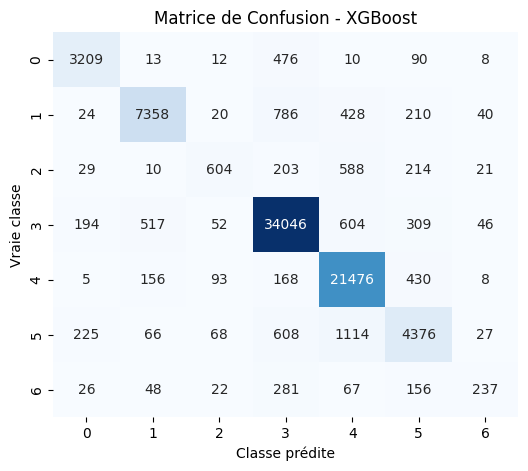


Top 15 features selon XGBoost :


,feature,importance
4,weapon_used_cd,0.623144
0,mocodes,0.228176
1,premis_cd,0.077913
5,vict_age,0.033378
2,lat,0.013774
3,lon,0.013548
6,location,0.010067


In [76]:
# ============================================================
#  TEST XGBoost SUR LES FEATURES SÉLECTIONNÉES
# ============================================================
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*80)
print("TEST XGBoost SUR LES FEATURES SÉLECTIONNÉES")
print("="*80)

# 1. Train/test split avec seulement les features sélectionnées
X_train, X_test, y_train, y_test = train_test_split(
    X_selected,           # ← ici on utilise bien X_selected
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 2. Modèle XGBoost (paramètres solides de base)
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    eval_metric='logloss',
    tree_method='hist',      # plus rapide
    n_jobs=-1
)

print("Entraînement XGBoost en cours...")
xgb_model.fit(X_train, y_train)

# 3. Prédictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 4. Métriques complètes
print("\n=== RÉSULTATS XGBoost ===")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"AUC ROC (macro) : {roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr'):.4f}")


print("\nClassification Report :")
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')


# 5. Matrice de confusion (belle)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matrice de Confusion - XGBoost')
plt.ylabel('Vraie classe')
plt.xlabel('Classe prédite')
plt.show()

# 6. Top 15 features les plus importantes selon XGBoost
importances_xgb = pd.DataFrame({
    "feature": X_selected.columns,
    "importance": xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

print("\nTop 15 features selon XGBoost :")
display(importances_xgb.head(15))

In [ ]:
# --- 3. Sauvegarde des Processeurs et Données ---
print("\n" + "=" * 80)
print("SAUVEGARDE POUR L'ÉTAPE DE MODELING")
print("=" * 80)

os.makedirs("processors", exist_ok=True)

# A. Sauvegarder X et y (Complets, sans split ni scaling pour l'instant)
# Cela permet au notebook de modeling de faire ses propres splits dynamiques.
data_package = {
    "X": X,
    "y": y,
    "numeric_cols": numeric_cols,  # On passe l'info pour faciliter le scaling plus tard
    "categorical_cols": [c for c in X.columns if c not in numeric_cols]
}
with open("processors/data_for_modeling.pkl", "wb") as f:
    pickle.dump(data_package, f)
print("✓ Données X et y sauvegardées (brutes, prêtes pour optimisation)")

# B. Sauvegarder le LabelEncoder (C'est safe, ça ne dépend pas du train/test)
with open("processors/label_encoder_target.pkl", "wb") as f:
    pickle.dump(le, f)
print("✓ LabelEncoder de la cible sauvegardé")

# C. Sauvegarder le mapping cible (Dictionnaire lisible pour humain)
target_mapping = {
    "classes": list(le.classes_),
    "mapping": {cls: int(le.transform([cls])[0]) for cls in le.classes_}
}
with open("processors/target_mapping.pkl", "wb") as f:
    pickle.dump(target_mapping, f)
print("✓ Mapping cible (Dictionnaire) sauvegardé")

# D. Sauvegarder la config des features (Liste des colonnes pour vérifier l'ordre plus tard)
feature_config = {
    "final_features": list(X.columns),
    "target_name": target_col
}
with open("processors/features_config.pkl", "wb") as f:
    pickle.dump(feature_config, f)
print("✓ Configuration des colonnes sauvegardée")

print("\n🚀 PRÊT POUR LE MODELING ! Vous pouvez passer au notebook suivant.")


SAUVEGARDE POUR L'ÉTAPE DE MODELING


NameError: name 'os' is not defined